In [29]:
%matplotlib inline
import numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, rc, animation
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [1]:
# define a linear function
def lin(a,b,x): return (a*x)+b

In [2]:
a=3.
b=8.

In [5]:
# generate input (x) and output (y)
n=30
x = random(n)
y = lin(a,b,x)

In [6]:
x

array([ 0.18230059,  0.00321185,  0.64873583,  0.29683204,  0.15940999,
        0.67897891,  0.1228799 ,  0.27586181,  0.72344976,  0.21383845,
        0.4122877 ,  0.1288414 ,  0.07345681,  0.64165869,  0.79475941,
        0.440906  ,  0.25354254,  0.60543873,  0.7788941 ,  0.13944802,
        0.22444245,  0.29791989,  0.6355432 ,  0.87399988,  0.94010031,
        0.73451378,  0.96217159,  0.38723161,  0.62015315,  0.48702435])

In [7]:
y

array([  8.54690176,   8.00963555,   9.9462075 ,   8.89049611,
         8.47822998,  10.03693674,   8.3686397 ,   8.82758544,
        10.17034928,   8.64151534,   9.23686309,   8.3865242 ,
         8.22037044,   9.92497606,  10.38427824,   9.32271799,
         8.76062763,   9.8163162 ,  10.33668231,   8.41834405,
         8.67332734,   8.89375968,   9.90662959,  10.62199963,
        10.82030092,  10.20354133,  10.88651478,   9.16169484,
         9.86045946,   9.46107305])

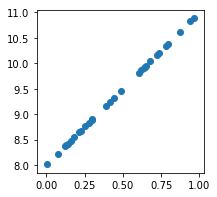

In [12]:
plt.scatter(x,y)

In [15]:
# define a loss function: sum of squared error
# loss function = (y-(a*x+b))**2
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [33]:
# Pretend we don't know a & b
a_guess = -1.
b_guess = 1.
avg_loss(y,a_guess,b_guess,x)

8.9013

In [17]:
# set a learning rate
lr = 0.01

'''
l = loss function = (y-(a*x+b))**2
note: dl/dn = derivative of loss function wrt n
dl/db	= 2 (b + a x - y)	= 2 (y_pred - y)
dl/da	= 2 x (b + a x - y)	= x * dl/db
'''

In [34]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    # calculate gradient of loss wrt a, b
    dldb = 2*(y_pred-y)
    dlda = x*dldb
    # update the guesses in the opposite direction of the gradient
    a_guess -= lr*dlda.mean()
    b_guess -= lr*dldb.mean()

2.19290543696
7.40760750004


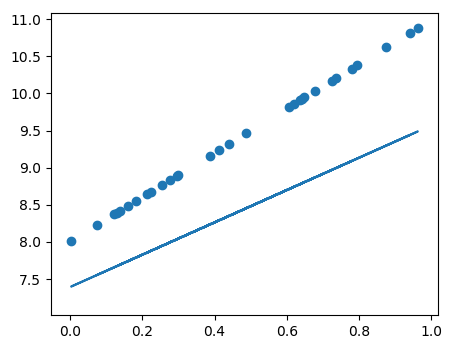

In [51]:
#plot y_pred (predicted output)
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))

for i in range(10):
    line.set_ydata(lin(a_guess,b_guess,x)) #set y data of plot
    upd()
print(a_guess)
print(b_guess)